In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model/tflite/tomato_2024-05-03_20-41-52.tflite")
interpreter.allocate_tensors()

In [23]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [24]:
test_dataset = image_dataset_from_directory(
    "datasplit/test",
    image_size=(input_details[0]['shape'][1], input_details[0]['shape'][2]),
    batch_size=32,
    shuffle=True
)

class_names = test_dataset.class_names

Found 1610 files belonging to 10 classes.


In [25]:
# Convert the dataset to a numpy array
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())
    return np.array(images), np.array(labels)


image_batch, label_batch = dataset_to_numpy(test_dataset)

# Select a random batch of 32 images
random_batch_index = random.randint(0, len(image_batch) // 32 - 1)
image_batch = image_batch[random_batch_index *
                          32: (random_batch_index + 1) * 32]
label_batch = label_batch[random_batch_index *
                          32: (random_batch_index + 1) * 32]


In [26]:
# Predictions for the random batch
batch_predictions = []
for image in image_batch:
    # Preprocess the image if necessary
    image = np.expand_dims(image, axis=0).astype(np.float32)

    # Set the tensor to point to the input data to be inferred
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run the inference
    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data
    output_data = interpreter.get_tensor(output_details[0]['index'])
    batch_predictions.append(output_data[0])
    
batch_predictions = np.array(batch_predictions)

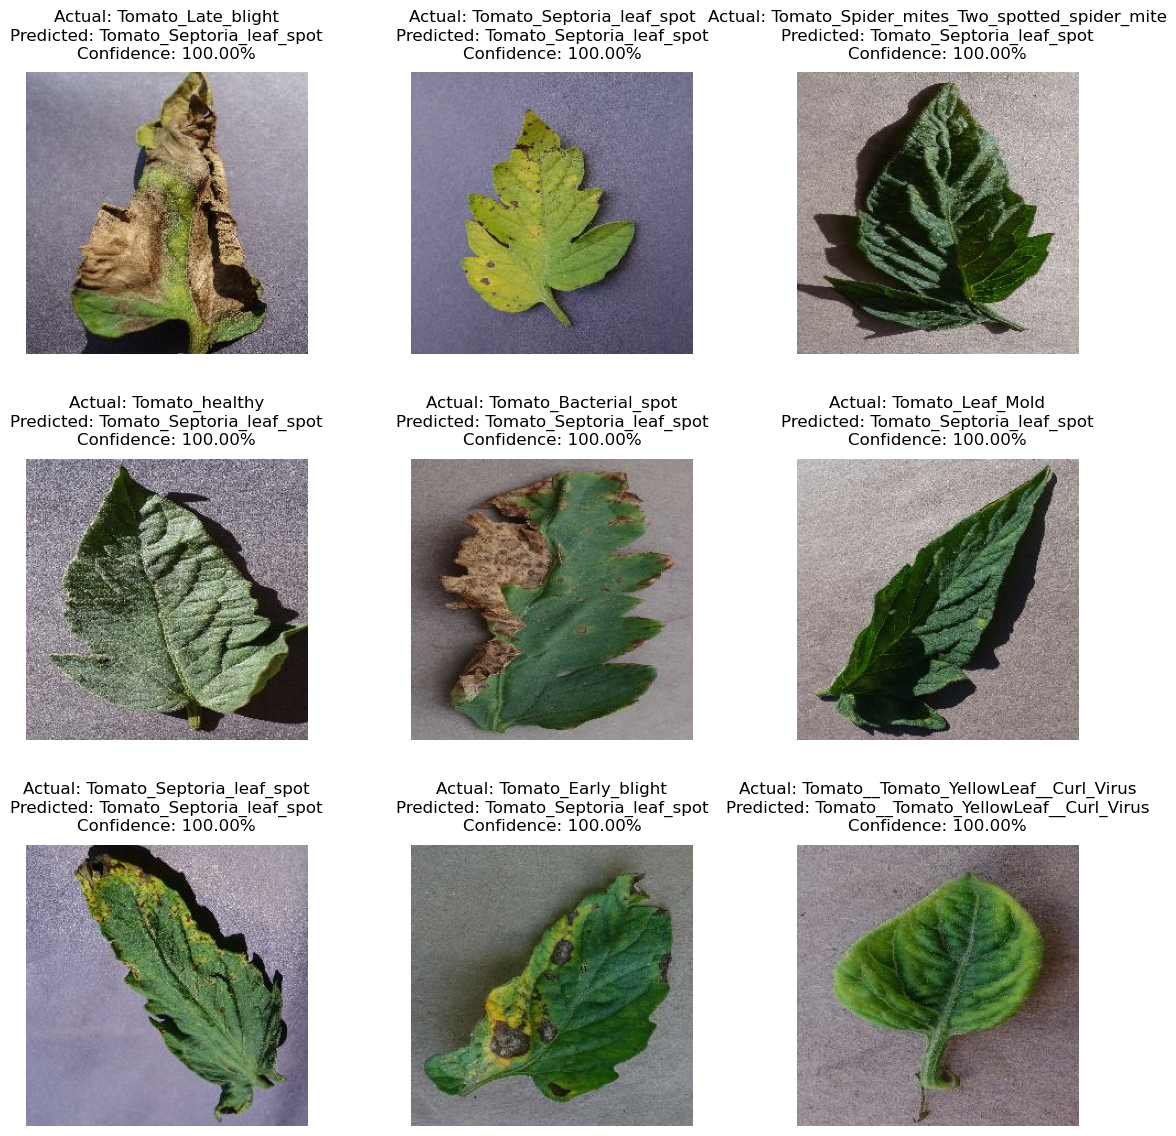

In [27]:
# Randomly select 9 images from the batch
random_indices = random.sample(range(len(image_batch)), 9)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, index in enumerate(random_indices):
    row = i // 3
    col = i % 3

    image = image_batch[index]
    label = int(label_batch[index])
    prediction = np.argmax(batch_predictions[index])
    # Confidence percentage
    confidence = np.max(batch_predictions[index]) * 100

    # Ensure image is in the correct format
    axs[row, col].imshow(image.astype("uint8"))
    axs[row, col].set_title(
        f"Actual: {class_names[label]}\nPredicted: {class_names[prediction]}\nConfidence: {confidence:.2f}%", pad=10)
    axs[row, col].axis('off')

plt.tight_layout(pad=3.0)
plt.show()
